In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
style.use("fivethirtyeight")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
m=500
x=8*np.random.rand(m,1)-5
y=0.5*x**2+x+2+np.random.randn(m,1)
dataset=pd.DataFrame(x,columns=["x"])
dataset["y"]=y
dataset.head()
x=dataset["x"]
y=dataset["y"]
x=np.array(x).reshape(-1,1)

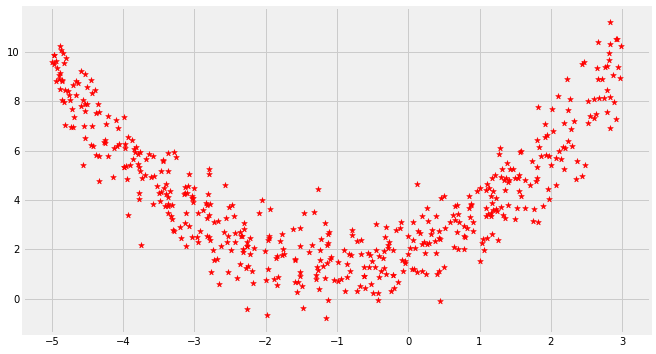

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,marker="*",color="red")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)
x_test=sorted(x_test,reverse=False)

# Let's Ensemble the trees

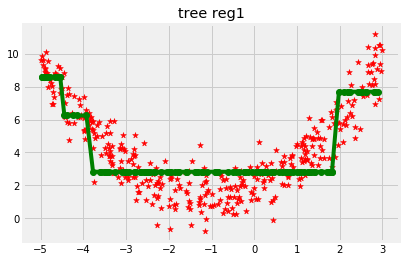

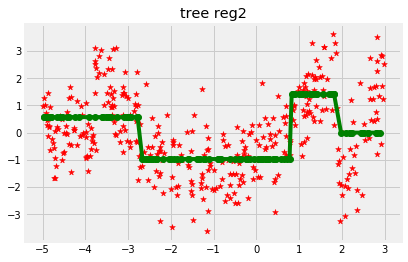

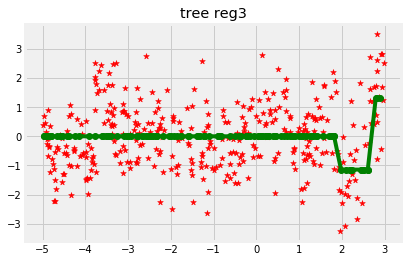

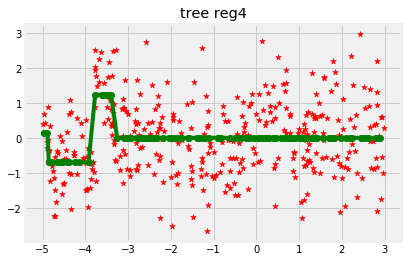

In [6]:
#1st tree
tree_reg1=DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(x_train,y_train)
yp=tree_reg1.predict(x_test)
plt.scatter(x_train,y_train,marker="*",color="red")
plt.plot(x_test,yp,marker='o',color='green')
plt.title("tree reg1")
plt.show()

#2nd tree
y_train_res1=y_train-tree_reg1.predict(x_train)
tree_reg2=DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(x_train,y_train_res1)
yp=tree_reg2.predict(x_test)
plt.scatter(x_train,y_train_res1,marker="*",color="red")
plt.plot(x_test,yp,marker='o',color='green')
plt.title("tree reg2")
plt.show()

#3rd tree
y_train_res2=y_train_res1-tree_reg2.predict(x_train)
tree_reg3=DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(x_train,y_train_res2)
yp=tree_reg3.predict(x_test)
plt.scatter(x_train,y_train_res2,marker="*",color="red")
plt.plot(x_test,yp,marker='o',color='green')
plt.title("tree reg3")
plt.show()

#4rd tree
y_train_res3=y_train_res2-tree_reg3.predict(x_train)
tree_reg4=DecisionTreeRegressor(max_depth=2)
tree_reg4.fit(x_train,y_train_res3)
yp=tree_reg4.predict(x_test)
plt.scatter(x_train,y_train_res3,marker="*",color="red")
plt.plot(x_test,yp,marker='o',color='green')
plt.title("tree reg4")
plt.show()

y_pred=sum(tree.predict(x_test) for tree in (tree_reg1,tree_reg2,tree_reg3,tree_reg4))

In [7]:
error=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                     np.sqrt(mean_squared_error(y_test,y_pred)),
                    mean_absolute_error(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,11.743486,3.426877,2.581966,-0.725605


# Let's make it into single model

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(max_depth=2,n_estimators=10,learning_rate=1.0)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
error=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                     np.sqrt(mean_squared_error(y_test,y_pred)),
                    mean_absolute_error(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,11.911439,3.451295,2.607025,-0.751755


# Earlystopping

Text(0.5, 1.0, 'early stopping')

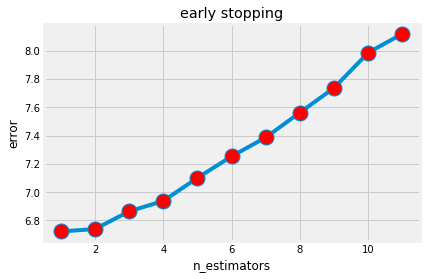

In [9]:
gbrestp=GradientBoostingRegressor(max_depth=2,warm_start=True)
min_error=float("inf")
error=[]
error_incresing_rate=0
for i in range(1,300):
    gbrestp.n_estimators=i
    gbrestp.fit(x_train,y_train)
    y_pred=gbrestp.predict(x_test)
    val_error=mean_squared_error(y_test,y_pred)
    error.append(val_error)
    if val_error<min_error:
        min_error=val_error
        error_incresing_rate=0
    else:
        error_incresing_rate += 1
        if error_incresing_rate==10: 
            #earlystopping after 5 violations
            break
plt.plot(range(1,i+1),error,marker="o",markerfacecolor="red",markersize=15)
plt.ylabel("error")
plt.xlabel("n_estimators")
plt.title("early stopping")